# Fracture networks as graphs

### Import packages

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pickle
import random

## Reading graph

In [2]:
# Read the graphs
G = pickle.load(open(f'data/graphs/tsan_fracgraph.pickle', 'rb'))

In [3]:
pos = nx.get_node_attributes(G, 'pos')

## Calculating betweenness and percolation centralities

In [4]:
from math import dist

target_points = [(2584887, 1130477), (2584666, 1130264), (2584364, 1130101), (2584073, 1129795), (2583609, 1129286), (2583371, 1128998)]
target_nodes = []
for point in target_points:
    closest = min(pos, key=lambda n : dist(pos[n], point))
    target_nodes.append(closest)
    
nx.set_node_attributes(G, 0, 'target')
for n in target_nodes:
    G.nodes[n]['target'] = 0.99

print(f'Node {target_nodes} set as target')

Node [1133, 1132, 753, 736, 214, 2765] set as target


In [5]:
state = {n: G.nodes[n].get('target',0.99) for n in G.nodes}

In [6]:
node_colors = [G.nodes[n].get('target',0) for n in G.nodes]

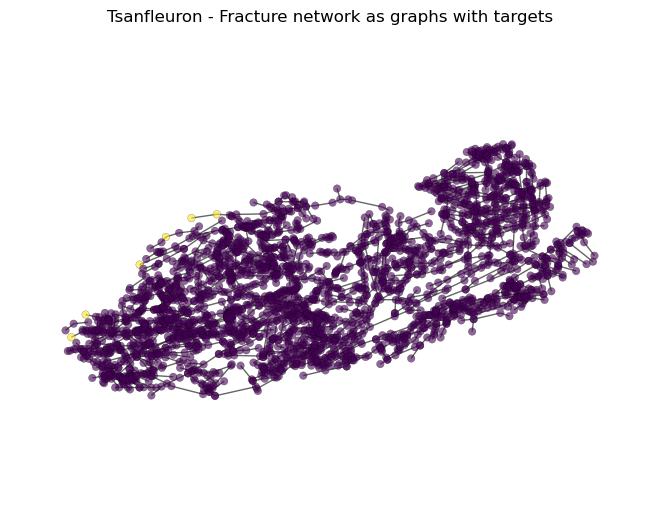

In [7]:
# Plot the fracture network as graphs
kwds = {
    'with_labels': False, 
    'node_shape': 'o',         # node symbol
    'node_color': node_colors,      # node color
    'edgecolors': 'black',     # node border color
    'node_size': 30,            # node size
    'linewidths': 0.2,         # node border width
    'edge_color': 'black',     # edge color
    'width': 1,                # edge width
    'font_size': 8,            # font size
    'font_color': 'black',      # font color
    'alpha': 0.6 ,              # transparency
}

pos = nx.get_node_attributes(G, 'pos')

nx.draw(G, pos=pos, **kwds)
plt.title('Tsanfleuron - Fracture network as graphs with targets')
plt.axis('equal')
    
plt.show()

In [8]:
# Calculte betweenness centrality
b = nx.betweenness_centrality(G, weight=None)
bw = nx.betweenness_centrality(G, weight='length')
p = nx.percolation_centrality(G, states=state, weight=None)
pw = nx.percolation_centrality(G, states=state, weight='length')

precision = 5
br = {node: round(value, precision) for node, value in b.items()}

In [9]:
for node in G.nodes:
    G.nodes[node]['betweenness_centrality'] = round(b[node], 3)
    G.nodes[node]['betweenness_length'] = round(bw[node], 3)
    G.nodes[node]['percolation_centrality'] = round(p[node], 3)
    G.nodes[node]['percolation_length'] = round(pw[node], 3)

In [10]:
print(f'max percolation:{max(p)}, max betweenness:{max(b)}')

max percolation:2784, max betweenness:2784


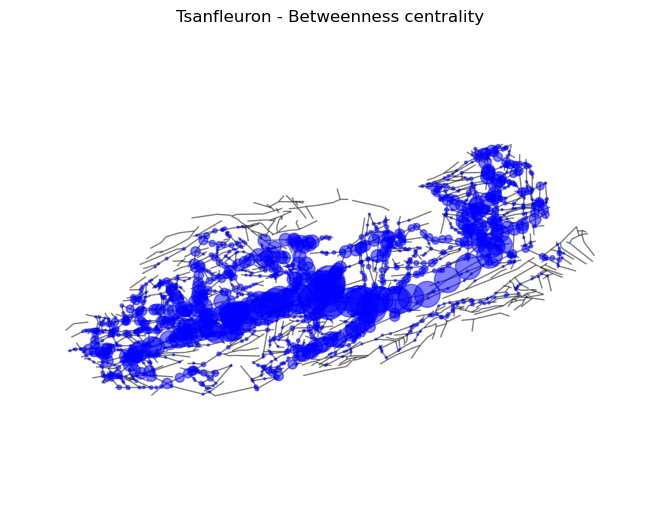

In [11]:
# Plot betweeness centrality
node_size = [v * 2000 for v in (nx.get_node_attributes(G, 'betweenness_centrality')).values()]
nx.draw(G, pos, with_labels=False, node_size=node_size, node_color='blue', font_color='black', alpha=0.5)

plt.title('Tsanfleuron - Betweenness centrality')
plt.axis('equal')
plt.show()

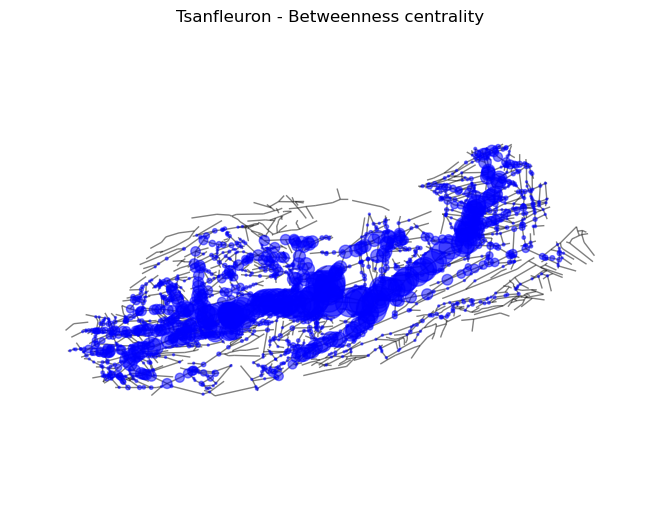

In [12]:
# Plot betweeness centrality
node_size = [v * 2000 for v in (nx.get_node_attributes(G, 'betweenness_length')).values()]
nx.draw(G, pos, with_labels=False, node_size=node_size, node_color='blue', font_color='black', alpha=0.5)

plt.title('Tsanfleuron - Betweenness centrality')
plt.axis('equal')
plt.show()

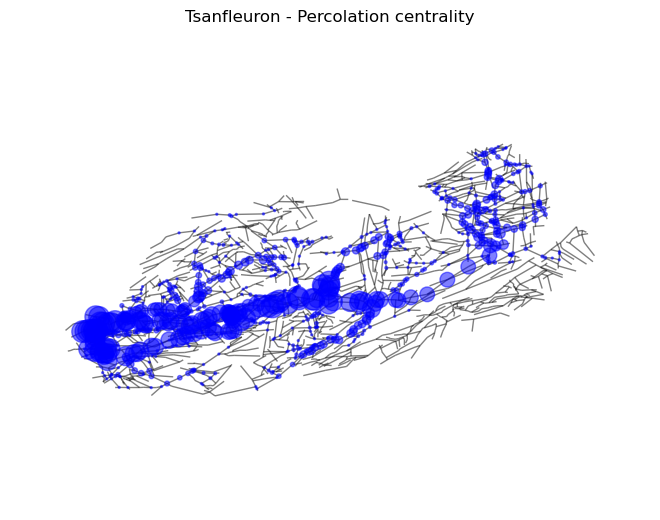

In [13]:
# Plot betweeness centrality
pos = nx.get_node_attributes(G, 'pos')
node_size = [v * 2000 for v in (nx.get_node_attributes(G, 'percolation_centrality')).values()]
nx.draw(G, pos, with_labels=False, node_size=node_size, node_color='blue', font_color='black', alpha=0.5)

plt.title('Tsanfleuron - Percolation centrality')
plt.axis('equal')
plt.show()

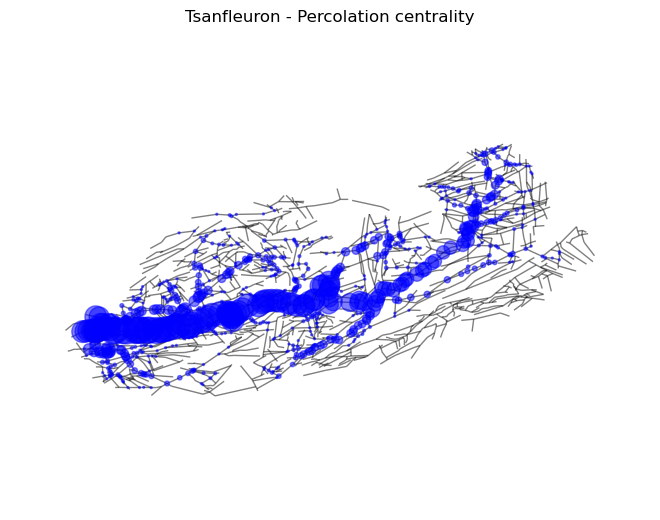

In [14]:
# Plot betweeness centrality
pos = nx.get_node_attributes(G, 'pos')
node_size = [v * 2000 for v in (nx.get_node_attributes(G, 'percolation_length')).values()]
nx.draw(G, pos, with_labels=False, node_size=node_size, node_color='blue', font_color='black', alpha=0.5)

plt.title('Tsanfleuron - Percolation centrality')
plt.axis('equal')
plt.show()

In [15]:
#Export graph as pickle
output = f'data/graphs/tsan_fracgraph.pickle'
pickle.dump(G, open(output, 'wb'))

## Calculate percolation

We simulate bond percolation by progressively removing nodes randomly and checking the size of the largest connected component.


In [16]:
def simulate_percolation(G, trials=100, step=0.05):
    """
    Simulate percolation by progressively removing nodes at random
    and tracking the size of the largest connected component.
    """
    node_count = len(G)
    results = []

    for fraction in [i * step for i in range(0, int(1 / step) + 1)]:
        sizes = []
        for _ in range(trials):
            G_copy = G.copy()
            nodes_to_remove = random.sample(list(G_copy.nodes()), int(fraction * node_count))
            G_copy.remove_nodes_from(nodes_to_remove)
            largest_cc = max(nx.connected_components(G_copy), key=len, default=[])
            sizes.append(len(largest_cc) / node_count)
        avg_size = sum(sizes) / len(sizes)
        results.append((fraction, avg_size))

    return results

In [17]:
results=simulate_percolation(G)

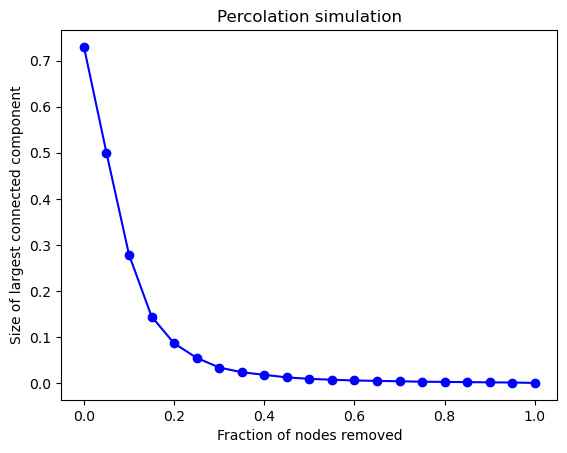

In [18]:
x, y = zip(*results)

plt.plot(x, y, marker='o', color='blue')
plt.xlabel("Fraction of nodes removed")
plt.ylabel("Size of largest connected component")
plt.title("Percolation simulation")
plt.grid(False)
plt.show()